In [31]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from sklearn.metrics import mean_squared_error

In [32]:

# Load the dataset
mat = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines.mat')
mat_gt = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines_gt.mat')

data = mat['indian_pines']
labels = mat_gt['indian_pines_gt']

/home/utkarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(145, 145)
(145, 145)
Accuracy: 0.053650416171224735
MSE: 60.42420927467301


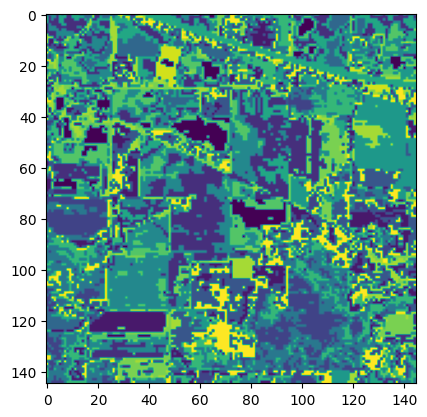

In [39]:
# Reshape the data to (num_samples, num_features)
n, m, num_samples = data.shape
data_reshaped = np.reshape(data, (n*m, num_samples))

# Perform PCA to reduce the dimensionality of the data
num_components = 16
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_reshaped)

# Perform clustering using KMeans
num_clusters = 16
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_pca)

# Reshape the labels to (num_samples,)
labels_reshaped = np.reshape(labels, (n*m,))

# Assign each pixel to a cluster
cluster_labels = kmeans.predict(data_pca)

# Reshape the cluster labels and display the segmented image
cluster_labels_reshaped = np.reshape(cluster_labels, (n, m))
accuracy = np.mean(cluster_labels_reshaped == labels)
print("Accuracy:", accuracy)

cluster_labels_flat = np.reshape(cluster_labels, (n*m,))
mse = mean_squared_error(labels_reshaped, cluster_labels_flat)
print("MSE:", mse)
plt.imshow(cluster_labels_reshaped)
plt.show()